ในโครงการนี้ เราจะดำเนินการแยกข้อความออกจากรูปภาพ หลังจากแยกข้อความแล้ว เราจะใช้ฟังก์ชันพื้นฐานของ OpenCV กับข้อความนั้นเพื่อปรับปรุงและเพื่อให้ได้ผลลัพธ์ที่แม่นยำยิ่งขึ้น โครงการนี้จะมีประโยชน์มากเพราะจะช่วยประหยัดเวลาและความพยายามในการพิมพ์จากรูปภาพ

In [ ]:
# import requests to install tesseract
import requests

เราจะนำเข้าไลบรารีคำขอเพื่อดึง URL สำหรับไฟล์และรูปภาพ git

In [ ]:
# Downloading tesseract-ocr file
r = requests.get("https://raw.githubusercontent.com/tesseract-ocr/tessdata/4.00/eng.traineddata", stream = True)  
  
# Writing data to file to avoid path isuues
with open("/usr/share/tesseract-ocr/4.00/tessdata/eng.traineddata", "wb") as file:  
    for block in r.iter_content(chunk_size = 1024): 
         if block:  
             file.write(block)

ตอนนี้เราจะดาวน์โหลด tesseract ซึ่งจำเป็นสำหรับไลบรารี pytesseract เพื่อเรียกใช้และบันทึกไฟล์ที่พาธในฟังก์ชัน open()

In [ ]:
# Installing libraries required for optical character recognition

!apt install tesseract-ocr 
!apt inatall libtesseract-dev 
!apt install libmagickwand-dev

# Importing IPython to clear output which is not important 
from IPython.display import HTML, clear_output
clear_output()

In [ ]:
# check list lange
!sudo tesseract --list-langs

List of available languages (3):
ind
eng
osd


ตอนนี้เราจะติดตั้งไลบรารี pytesseract และ opencv

In [ ]:
# installing py teseract and opencv
!pip install pytesseract 
!pip install opencv-python
clear_output()

ตอนนี้เราจะติดตั้งไลบรารี pytesseract และ opencv

In [ ]:
# Import libraries
from PIL import Image
import pytesseract
import cv2
import numpy as np
from pytesseract import Output
import re

Importing required libraries

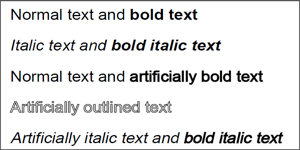

In [ ]:
# reading image from url 
image = Image.open(requests.get('https://i.stack.imgur.com/pbIdS.png', stream=True).raw)
image = image.resize((300,150))
image.save('sample.png')
image
                   

ในขั้นตอนนี้ เราจะเปิดรูปภาพปรับขนาดแล้วบันทึกอีกครั้งเพื่อใช้และแสดงภาพเป็นภาพ

In [ ]:
# Simply extracting text from image 
custom_config = r'-l eng --oem 3 --psm 6'
text = pytesseract.pytesseract.image_to_string(image,config=custom_config)
print(text)

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text



ที่นี่เราจะแยกข้อความออกจากรูปภาพด้วยการกำหนดค่าแบบกำหนดเอง

In [ ]:
# extracting text from image and removing irrelevant symbols from charactors
try:
  text=pytesseract.image_to_string(image,lang="eng")
  characters_to_remove = "!()@—*“>+-/,'|£#%$&^_~",
  new_string = text
  for character in characters_to_remove:
    new_string = new_string.replace(character, "")
  print(new_string)
except IOError as e:
    print("Error (%s)." % e)

 

 

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text

 

 



ตอนนี้เราจะลบสัญลักษณ์ที่ไม่ต้องการออกจากข้อความที่เราแยกออกโดยแทนที่สัญลักษณ์ด้วยสตริงว่าง

In [ ]:
# Now we will perform opencv operations to get text from complex images
image = cv2.imread('sample.png')

ในเซลล์ด้านบน เรากำลังอ่านรูปภาพในรูปแบบ opencv เพื่อประมวลผลต่อไป สิ่งนี้จำเป็นเมื่อเราต้องการแยกข้อความออกจากรูปภาพที่ซับซ้อน

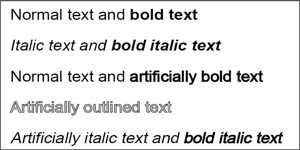

In [ ]:
# Get grayscale image
def get_grayscale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = get_grayscale(image)
Image.fromarray(gray)

การแปลงรูปภาพเป็นโทนสีเทาเพื่อให้การประมวลผลมีความซับซ้อนน้อยลง เนื่องจากจะมีค่าเพียงสองค่าคือ 0 และ 1 เมธอด cv2.cvtColor() ใช้เพื่อแปลงรูปภาพจากปริภูมิสีหนึ่งไปยังอีกสีหนึ่ง มีวิธีการแปลงพื้นที่สีมากกว่า 150 วิธีใน OpenCV

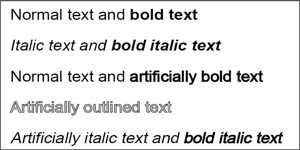

In [ ]:
# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
noise = remove_noise(gray)
Image.fromarray(gray)

ตอนนี้เราจะเบลอภาพเพื่อลบจุดรบกวนออกจากภาพ ที่นี่ ฟังก์ชัน cv2.medianBlur() คำนวณค่ามัธยฐานของพิกเซลทั้งหมดภายใต้หน้าต่างเคอร์เนล และพิกเซลกลางจะถูกแทนที่ด้วยค่ามัธยฐานนี้ นี้มีประสิทธิภาพสูงในการขจัดเสียงรบกวน

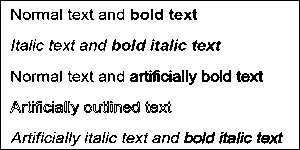

In [ ]:
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thresh = thresholding(gray)
Image.fromarray(thresh)

เราจะทำการแปลงเกณฑ์ที่นี่
cv2 หากค่าพิกเซลมากกว่าค่าเกณฑ์ จะมีการกำหนดค่าหนึ่งค่า (อาจเป็นสีขาว) มิฉะนั้นจะมีการกำหนดค่าอื่น (อาจเป็นสีดำ) ฟังก์ชันที่ใช้คือ cv2.threshold อาร์กิวเมนต์แรกคือรูปภาพต้นฉบับ ซึ่งควรเป็นภาพระดับสีเทา

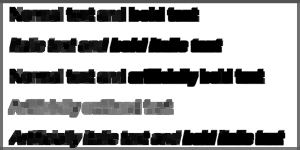

In [ ]:
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)
erode = erode(gray)
Image.fromarray(erode)

ที่นี่เรากำลังทำการเปลี่ยนแปลงที่กัดกร่อน
วิธีการ cv2.erode() ใช้ในการลบภาพ แนวคิดพื้นฐานของการกัดเซาะก็เหมือนกับการพังทลายของดินเท่านั้น มันกัดเซาะขอบเขตของวัตถุเบื้องหน้าออกไป (พยายามให้พื้นหน้าเป็นสีขาวเสมอ) โดยปกติจะดำเนินการกับภาพไบนารี มันต้องการสองอินพุต หนึ่งคือภาพต้นฉบับของเรา ส่วนที่สองเรียกว่าองค์ประกอบโครงสร้างหรือเคอร์เนล ซึ่งจะกำหนดลักษณะการทำงาน

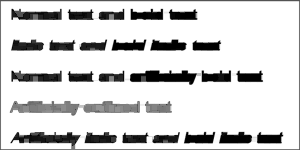

In [ ]:
#Morphology
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
opening = opening(gray)
Image.fromarray(opening)

ที่นี่เราจะทำการเปลี่ยนแปลงทางสัณฐานวิทยา มีประโยชน์ในการเปิดรูเล็กๆ ภายในวัตถุเบื้องหน้า หรือจุดสีขาวเล็กๆ บนวัตถุ

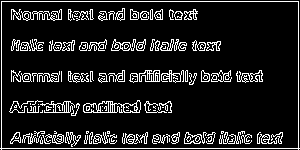

In [ ]:
#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)
canny = canny(gray)
Image.fromarray(canny)

การแปลง Canny ใช้เพื่อตรวจจับขอบในภาพ

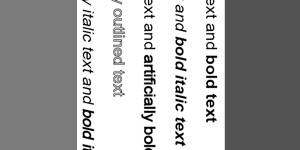

In [ ]:
#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated
rotated = deskew(gray)
Image.fromarray(rotated)

ตอนนี้เราจะใช้การเอียงกับภาพ การเอียงเป็นกระบวนการที่ลบความเอียงออกโดยหมุนรูปภาพในปริมาณที่เท่ากันกับการเอียงแต่ไปในทิศทางตรงกันข้าม ซึ่งส่งผลให้รูปภาพในแนวนอนและแนวตั้งมีข้อความวิ่งทั่วทั้งหน้าแทนที่จะเป็นมุม

In [ ]:
#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
match = match_template(gray, gray)
match

array([[1.]], dtype=float32)

ที่นี่เรากำลังพยายามจับคู่ภาพ เนื่องจากเรากำลังส่งภาพที่เหมือนกันเพื่อจับคู่ เราจึงมีความคล้ายคลึงกันถึง 99.99% ที่นี่ การจับคู่เทมเพลตเป็นวิธีการค้นหาและค้นหาตำแหน่งของรูปภาพเทมเพลตในรูปภาพขนาดใหญ่ OpenCV มาพร้อมกับฟังก์ชัน cv2.matchTemplate() เพื่อจุดประสงค์นี้ เพียงแค่เลื่อนรูปภาพเทมเพลตไปไว้เหนือรูปภาพอินพุต (เช่นเดียวกับภาพบิดเบี้ยว 2 มิติ) และเปรียบเทียบเทมเพลตและแพตช์ของรูปภาพอินพุตใต้รูปภาพเทมเพลต

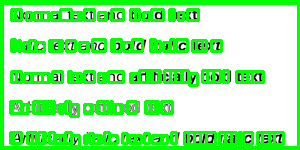

In [ ]:
# Drawing rectangle around text
img = cv2.imread('sample.png')
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
Image.fromarray(img)

ตอนนี้เราจะแยกอักขระทุกตัวในข้อความโดยสร้างสี่เหลี่ยมผืนผ้าล้อมรอบ

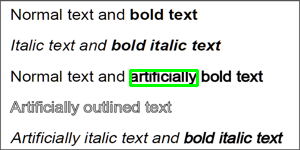

In [ ]:
# Drawing pattern on specific pattern or word
img = cv2.imread('sample.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

date_pattern = 'artificially'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
    	if re.match(date_pattern, d['text'][i]):
	        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
	        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
Image.fromarray(img)

ในทำนองเดียวกันเราสามารถวาดสี่เหลี่ยมผืนผ้ารอบรูปแบบหรือคำเฉพาะ

# Conclusion:

เราเริ่มต้นด้วยการเรียนรู้วิธีติดตั้ง tesseract ซึ่งใช้สำหรับการแยกข้อความ 
ต่อไปเราถ่ายภาพและดึงข้อความจากภาพนั้น เราได้เรียนรู้ว่าเราจำเป็นต้อง
ใช้ฟังก์ชันการแปลงรูปภาพบางอย่างของ OpenCV เพื่อแยกข้อความออกจากรูปภาพที่ซับซ้อน

## Scope:

องค์กรต่างๆ สามารถใช้สิ่งนี้เพื่อดึงข้อมูลที่เป็นประโยชน์จากรูปภาพและจัดเก็บไว้ บุคคลสามารถใช้เพื่อประหยัดเวลาและความพยายามในการพิมพ์